In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as mtp

## **Loading the Dataset**

In [2]:
#Loading the dataset
data = pd.read_csv('/content/Churn_Modelling.csv')

## **Understanding the Data**

In [4]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## **Univariate Analysis Visualisation**

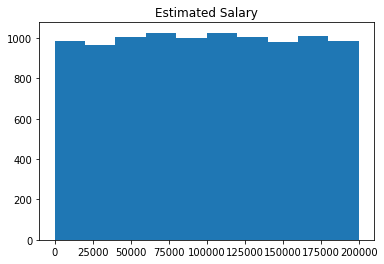

In [8]:
#Histogram
mtp.hist(data["EstimatedSalary"])
mtp.title("Estimated Salary")
mtp.show()

Text(0.5, 1.0, 'Count Plot')

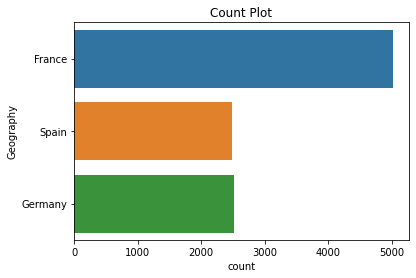

In [35]:
#CountPlot
import seaborn as sns
mtp.figure()
sns.countplot(y = "Geography", data = data)
mtp.title("Count Plot")

## **Bi-variate Analysis Visualisation**

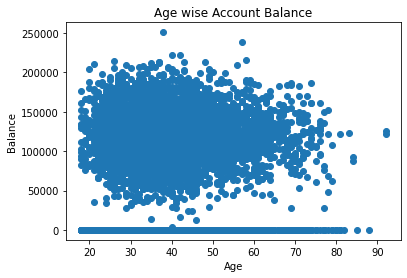

In [15]:
mtp.scatter(data["Age"], data["Balance"])
mtp.title("Age wise Account Balance")
mtp.xlabel("Age")
mtp.ylabel("Balance")
mtp.show()

<BarContainer object of 10000 artists>

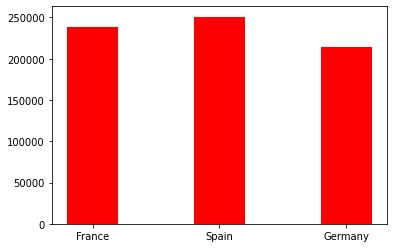

In [21]:
mtp.bar(data["Geography"],data["Balance"], color ='red',width = 0.4)

## **Multivariate Analysis Visualisation**

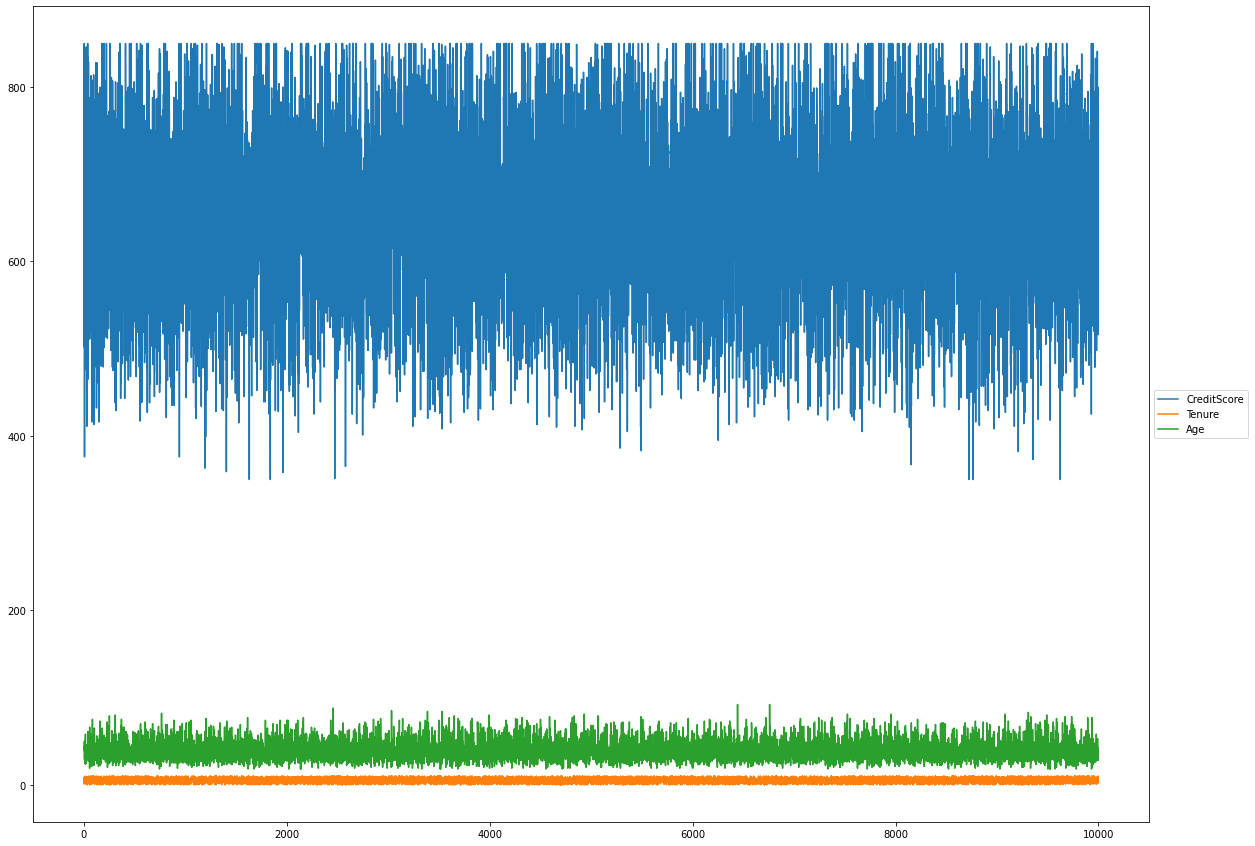

In [23]:
#ProfilePlot
ax = data[["CreditScore","Tenure","Age"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


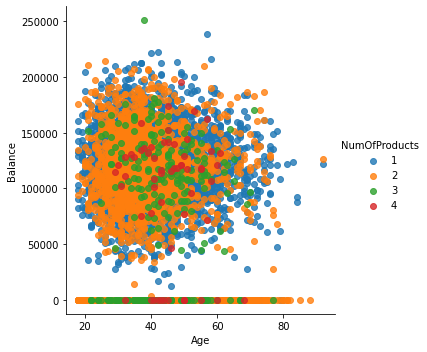

In [26]:
#scatterplot
sns.lmplot("Age", "Balance", data, hue="NumOfProducts", fit_reg=False);

# **Descriptive Statistics**

In [28]:
#Descriptive Statistics
print(data.shape)
print(data.describe())

(10000, 14)
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0

# **Handle the Missing Values**

In [37]:
data.isna().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No Missing Values

# **Finding and Replacing the Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


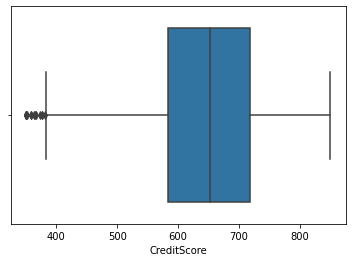

In [41]:
sns.boxplot(data['CreditScore'],data=data)

# **Categorical Columns**

In [46]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

# **Split the data into Dependent & Independent**

In [49]:
X = data.iloc[:, :-1].values

In [50]:
Y = data.iloc[:, -1].values

# **Split the data into Training & Test**

In [54]:
#seperating the X and the Y from the dataset
A=data.drop(['Exited'], axis=1)
B=data["Exited"]
print(X.shape)
print(Y.shape)
X_data=A.values
Y_data=B.values
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 66)

(10000, 13)
(10000,)
